In [2]:
import pandas as pd

df = pd.read_csv('train_ver2.csv')
df.isnull().sum()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

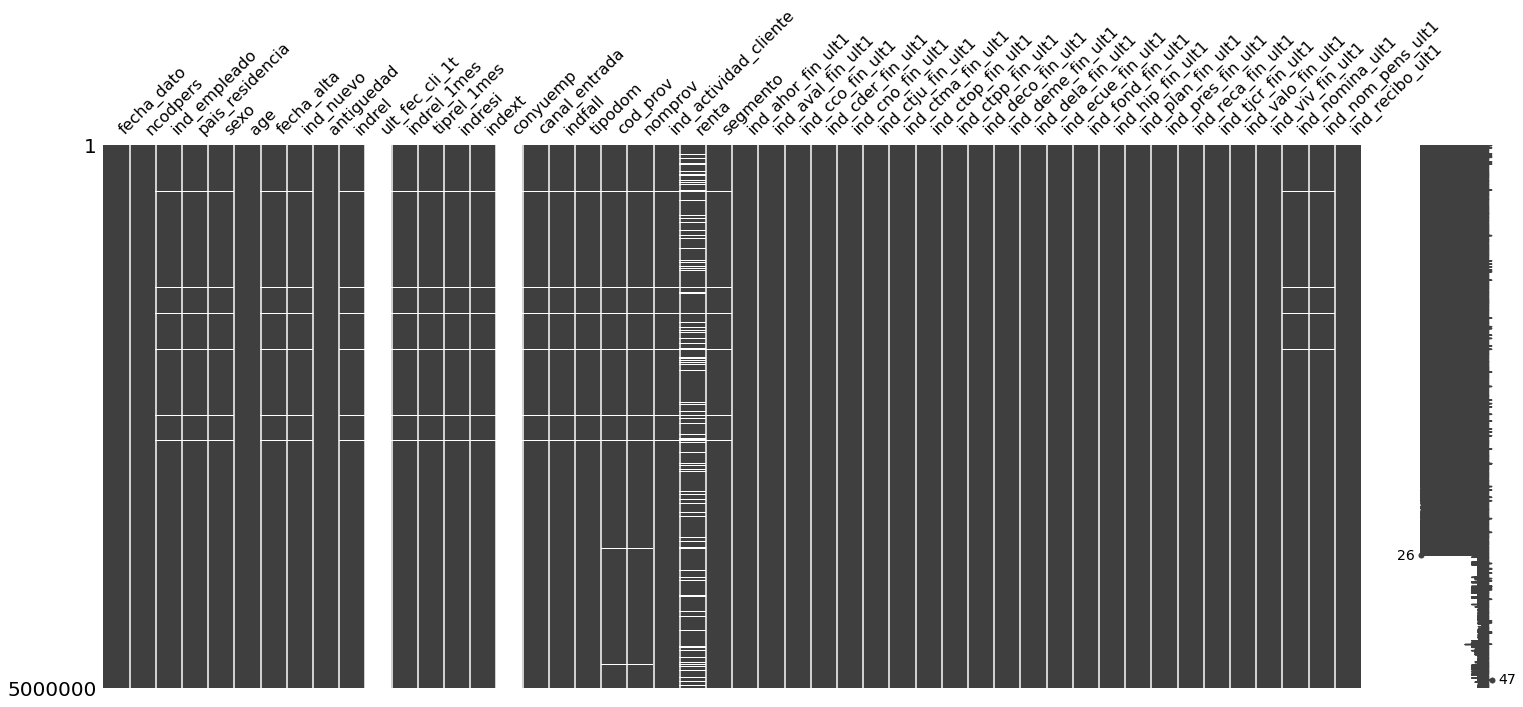

In [3]:
import missingno as msno

msno.matrix(df.iloc[0:5000000])

In [2]:
import numpy as np

# 避免" 21"的情況發生
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# 刪掉27734那幾筆資料
nan_row = np.where(df.iloc[:, 2].isnull())[0]
df.drop(nan_row, inplace=True)

# 刪掉幾乎全部都是nan的兩個column
df.drop(['ult_fec_cli_1t', 'conyuemp'], inplace=True, axis=1)

# 刪掉數值都是1.0的column
df.drop(['tipodom'], inplace=True, axis=1)

# 把國家、省分代碼拿掉，換成以省分為feature，並且讓其他國家為others
df.drop(["pais_residencia", "cod_prov"], inplace=True, axis=1)
df.loc[df.nomprov.isnull(),"nomprov"] = "OTHERS"

In [3]:
df.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                   0
sexo                          70
age                            0
fecha_alta                     0
ind_nuevo                      0
antiguedad                     0
indrel                         0
indrel_1mes               122047
tiprel_1mes               122047
indresi                        0
indext                         0
canal_entrada             158392
indfall                        0
nomprov                        0
ind_actividad_cliente          0
renta                    2766641
segmento                  161634
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_fin_ult1              0
ind_ctop_fin_ult1              0
ind_ctpp_fin_ult1              0
ind_deco_fin_ult1              0
ind_deme_fin_ult1              0
ind_dela_f

In [9]:
# 把剩下有nan的row全部刪掉
df.dropna(inplace=True)

In [10]:
# 重設data frame的index
df.reset_index(drop=True, inplace=True)

In [11]:
df

,fecha_dato,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,H,35.0,2015-01-12,0.0,6,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,V,23.0,2012-08-10,0.0,35,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,V,23.0,2012-08-10,0.0,35,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,H,22.0,2012-08-10,0.0,35,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050615,N,H,23.0,2012-08-10,0.0,35,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795595,2016-05-28,1166767,N,V,25.0,2013-08-14,0.0,33,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
10795596,2016-05-28,1166766,N,V,25.0,2013-08-14,0.0,33,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
10795597,2016-05-28,1166765,N,V,22.0,2013-08-14,0.0,33,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
10795598,2016-05-28,1166764,N,V,23.0,2013-08-14,0.0,33,1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
df.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
i

In [14]:
df.to_csv('train_pre.csv', index=False)